# Utils

In [1]:
# Utils
from math import atan2

def orientation(a, b, c):
    ob = (b[0]-a[0], b[1]-a[1])
    oc = (c[0]-a[0], c[1]-a[1])
    det = ob[0]*oc[1]-ob[1]*oc[0]
    return -1 if det<0 else 1 if det>0 else 0

# Checks if the point b its on the segment ac
def onSegment(a,b,c):
    on_x_proyection = b[0]<=max(a[0],c[0]) and b[0]>= min(a[0],c[0])
    # print(f"pr_x: {on_x_proyection}")
    on_y_proyection = b[1]<=max(a[1],c[1]) and b[1]>= min(a[1],c[1])
    # print(f"pr_y: {on_y_proyection}")
    if(on_x_proyection and on_y_proyection): return True
    return False

def doIntersect(a,b,c,d):
    # Orientations between segment and the other points
    o_c_segment_ab = orientation(a,b,c)
    o_d_segment_ab = orientation(a,b,d)
    o_a_segment_cd = orientation(c,d,a)
    o_b_segment_cd = orientation(c,d,b)

    # Case 1
    if(o_c_segment_ab != o_d_segment_ab and o_a_segment_cd != o_b_segment_cd):
        return True
    
    # Special cases when they are colinear
    # print("Case 1")
    if(o_c_segment_ab == 0 and onSegment(a,c,b)): return True
    # print("Case 2")
    if(o_d_segment_ab == 0 and onSegment(a,d,b)): return True
    # print("Case 3")
    if(o_a_segment_cd == 0 and onSegment(c,a,d)): return True
    # print("Case 4")
    if(o_b_segment_cd == 0 and onSegment(c,b,d)): return True

    return False

def get_convex_hull(p):
    n = len(p)
    if n<3: return
    hull = []
    s_y = min(p, key=lambda x: x[1])
    p.sort(key=lambda x: (atan2(x[1]-s_y[1], x[0]-s_y[0]), -x[1], x[0]))
    for point in p:
        while len(hull)>=2 and orientation(hull[-2], hull[-1], point) <= 0:
            hull.pop()
        hull.append(point)
    return hull

# Lecture 2

Implementación de triangulación de polígonos utilizando componentes monotónicos.

In [2]:
import numpy as np

def generate_clockwise_polygon(n_points):
    # Generate random points
    points = np.random.rand(n_points, 2)
    
    # Calculate the centroid of the points
    centroid = points.mean(axis=0)
    
    # Calculate the angles from the centroid to the points
    angles = np.arctan2(points[:,1] - centroid[1], points[:,0] - centroid[0])
    
    # Sort the points by the angles in clockwise order
    sorted_points = points[angles.argsort()[::-1]]
    
    return sorted_points.tolist()


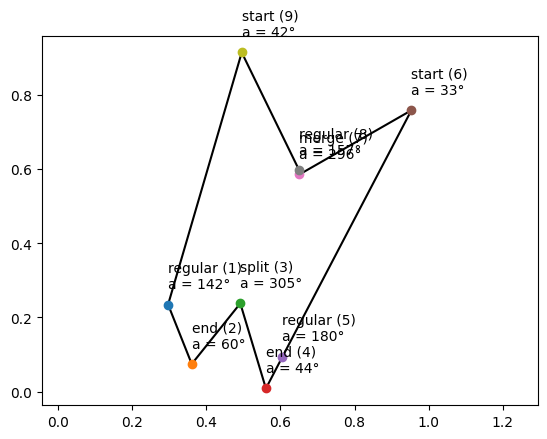

In [3]:
import numpy as np
from matplotlib.patches import Arc
import matplotlib.pyplot as plt

# type of vertex: start, end, split, merge, regular
def type(p1,p2,p3):
    v1 = np.array(p1)-np.array(p2)
    v2 = np.array(p3)-np.array(p2)
    angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    # angle = angle*180/np.pi
    orientation = np.cross(v1,v2)
    # print(f"p1: {p1} p2: {p2} p3: {p3}")
    # print(f"v1: {v1} v2: {v2}")
    # print(f"orientation: {orientation} angle: {angle}")
    if orientation < 0:
        angle = 2*np.pi-angle

    if (p1[1] <= p2[1] and p3[1] <= p2[1]) and angle <= np.pi:
        return 'start', angle*180/np.pi
    elif (p1[1] <= p2[1] and p3[1] <= p2[1]) and angle >= np.pi:
        return 'split', angle*180/np.pi
    elif (p1[1] >= p2[1] and p3[1] >= p2[1]) and angle <= np.pi:
        return 'end', angle*180/np.pi
    elif (p1[1] >= p2[1] and p3[1] >= p2[1]) and angle >= np.pi:
        return 'merge', angle*180/np.pi
    else:
        return 'regular', angle*180/np.pi

vs = generate_clockwise_polygon(9)
vs_segments = [[vs[i],vs[i+1]] for i in range(len(vs)-1)]+[[vs[-1],vs[0]]]
# print(vs)
# print(vs_segments)
for i in vs_segments:
    plt.plot([i[0][0],i[1][0]],[i[0][1],i[1][1]],'k')

c=1
for i in range(len(vs)-1,-1,-1):
    plt.plot(vs[i][0],vs[i][1],'o')
    t,a = type(vs[i-1],vs[i],vs[(i+1)%len(vs)])
    plt.text(vs[i][0],vs[i][1],f"{t} ({c})\na = {a:.0f}°\n")
    # arc = Arc((vs[i][0],vs[i][1]),0.1,0.1, theta1=0, theta2=a, color='r')
    # plt.gca().add_patch(arc)
    c+=1

plt.axis('equal')
plt.show()

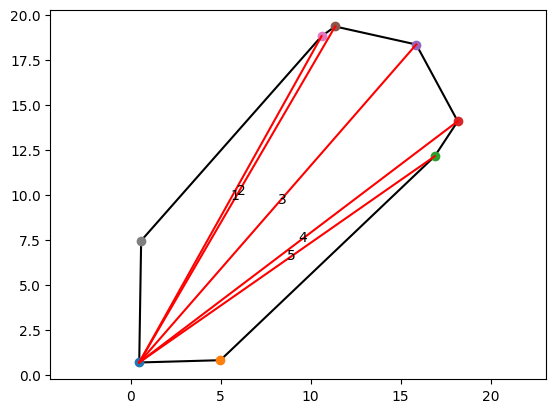

In [4]:
# test
import matplotlib.pyplot as plt
import random

# Triangulation of a y-monotone polygon
def triangulation_y_monotone(vs, segments):
    if len(vs) < 3:
        return segments
    segments.append((vs[0], vs[2]))
    vs.pop(1)
    segments = triangulation_y_monotone(vs, segments)
    return segments

# Generate random points
vs = []
n = 10
for _ in range(n):
    x = random.uniform(0, n)
    y = random.uniform(0, n)
    vs.append([x, y])

for _ in range(n):
    x = random.uniform(n, n+n)
    y = random.uniform(n, n+n)
    vs.append([x, y])

# for i in vs:
#     plt.plot(i[0],i[1],'o')

# Sort the vertices by y-coordinate
vs_convex = get_convex_hull(vs)
# vs_convex = generate_clockwise_polygon(n)
# vs_convex = [[0.391352132531387, 0.7961924874432531], [0.5341047349929394, 0.9582753910206583], [0.8111796640234493, 0.7726074799397267], [0.6356478832040228, 0.2896030899428891], [0.30091603006142453, 0.4226720117905507]]

for i in range(len(vs_convex)-1):
    plt.plot([vs_convex[i][0],vs_convex[i+1][0]],[vs_convex[i][1],vs_convex[i+1][1]],'k')
plt.plot([vs_convex[-1][0],vs_convex[0][0]],[vs_convex[-1][1],vs_convex[0][1]],'k')

for v in vs_convex:
    plt.plot(v[0],v[1],'o')

triangles = triangulation_y_monotone(vs_convex, [])[::-1][1:]
for t in triangles:
    plt.plot([t[0][0],t[1][0]],[t[0][1],t[1][1]],'r')
    plt.text((t[0][0]+t[1][0])/2,(t[0][1]+t[1][1])/2,f"{triangles.index(t)+1}")

plt.axis('equal')
plt.show()


(0.10094341433950405,0.0339460826897402)->(0.054087255945037604,0.03972127404259662) ---> (0.054087255945037604,0.03972127404259662)->(0.18530279819359752,0.5667808075815532)


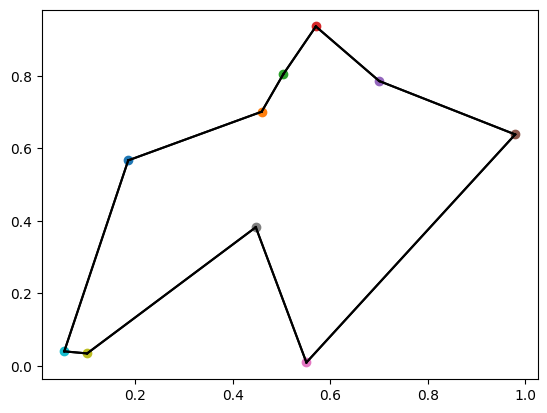

In [5]:
# Source of the DCEL: https://gist.github.com/anku255/94c11a4dae33a3483536eab435177782
import math as m

# Utils
def findHAngle(dx, dy):
  """Determines the angle with respect to the x axis of a segment
  of coordinates dx and dy
  """
  l = m.sqrt(dx*dx + dy*dy)
  if dy > 0:
    return m.acos(dx/l)
  else:
    return 2*m.pi - m.acos(dx/l)


class Vertex:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.hedges = []  # list of halfedges whose tail is this vertex

  def __eq__(self, other):
    if isinstance(other, Vertex):
      return self.x == other.x and self.y == other.y
    return NotImplemented

  def sortHedges(self):
    self.hedges.sort(key=lambda a: a.angle, reverse=True)

  def __repr__(self):
    return "({0},{1})".format(self.x, self.y)


class Hedge:
  # v1 -> v2
  def __init__(self, v1, v2):
    self.prev = None
    self.twin = None
    self.next = None
    self.tail = v1
    self.face = None
    self.angle = findHAngle(v2.x-v1.x, v2.y-v1.y)

  def __eq__(self, other):
    return self.tail == other.tail and \
        self.next.tail == other.next.tail

  def __repr__(self):
    if self.next is not None:
      return "({0},{1})->({2},{3})".format(self.tail.x, self.tail.y,
                                           self.next.tail.x,
                                           self.next.tail.y)
    else:
      return "({0},{1})->()".format(self.tail.x, self.tail.y)


class Face:
  def __init__(self):
    self.halfEdge = None
    self.name = None


class DCEL:
  def __init__(self):
    self.vertices = []
    self.hedges = []
    self.faces = []

  # Returns vertex object given x and y
  def findVertex(self, x, y):
    for v in self.vertices:
      if v.x == x and v.y == y:
        return v
    return None

  # Returns Halfedge whole vertices are v1 and v2
  # v1 and v2 are tuples
  def findHalfEdge(self, v1, v2):
    for halfEdge in self.hedges:
      nextEdge = halfEdge.next
      if (halfEdge.tail.x == v1[0] and halfEdge.tail.y == v1[1]) and (nextEdge.tail.x == v2[0] and nextEdge.tail.y == v2[1]):
        return halfEdge

    return None

  def build_dcel(self, points, segments):

    #  For each point create a vertex and add it to vertices
    for point in points:
      self.vertices.append(Vertex(point[0], point[1]))

    # For each input segment, create to hedges and assign their
    # tail vertices and twins

    # Structures of segment is [(0, 5), (2, 5)]
    for segment in segments:
      startVertex = segment[0]
      endVertex = segment[1]

      v1 = self.findVertex(startVertex[0], startVertex[1])
      v2 = self.findVertex(endVertex[0], endVertex[1])

      h1 = Hedge(v1, v2)
      h2 = Hedge(v2, v1)

      h1.twin = h2
      h2.twin = h1

      v1.hedges.append(h1)
      v2.hedges.append(h2)

      self.hedges.append(h1)
      self.hedges.append(h2)

    # For each endpoint, sort the half-edges whose
    # tail vertex is that endpoint in clockwise order.

    for vertex in self.vertices:
      vertex.sortHedges()

      noOfHalfEdges = len(vertex.hedges)

      if noOfHalfEdges < 2:
        return Exception("Invalid DCEL. There should be at least two half edges for a vertex")

      # For every pair of half-edges e1, e2 in clockwise order,
      # assign e1->twin->next = e2 and e2->prev = e1->twin.
      for i in range(noOfHalfEdges - 1):
        e1 = vertex.hedges[i]
        e2 = vertex.hedges[i+1]

        e1.twin.next = e2
        e2.prev = e1.twin

      # for the last and first halfedges pair
      e1 = vertex.hedges[noOfHalfEdges - 1]
      e2 = vertex.hedges[0]

      e1.twin.next = e2
      e2.prev = e1.twin

    # For every cycle, allocate and assign a face structure.
    faceCount = 0
    for halfEdge in self.hedges:

      if halfEdge.face == None:
        # print('here')
        faceCount += 1

        f = Face()
        f.name = "f" + str(faceCount)

        f.halfEdge = halfEdge
        halfEdge.face = f

        h = halfEdge
        while (not h.next == halfEdge):
          h.face = f
          h = h.next
        h.face = f

        self.faces.append(f)

  # Given a half, find all the regions
  # The format of segment is [(0, 5), (2, 5)]

  def findRegionGivenSegment(self, segment):
    # We need to find the half edge whose vertices
    # are that of the passed segment
    v1 = segment[0]
    v2 = segment[1]
    startEdge = self.findHalfEdge(v1, v2)

    h = startEdge
    while (not h.next == startEdge):
      # print(h, end="--->")
      h = h.next
    print(h, '--->', startEdge)


points = generate_clockwise_polygon(10)
segments = [[points[i], points[i+1]] for i in range(len(points)-1)]+[[points[-1], points[0]]]
myDCEL = DCEL()
myDCEL.build_dcel(points, segments)

myDCEL.findRegionGivenSegment(segments[-1])

for vertex in myDCEL.vertices:
  plt.plot(vertex.x, vertex.y, 'o')

for hedge in myDCEL.hedges:
  plt.plot([hedge.tail.x, hedge.next.tail.x], [hedge.tail.y, hedge.next.tail.y], 'k')

plt.show()


In [25]:
# BST for y-monotone polygon
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
    
    def insert(self, key):
        if self.val:
            if key < self.val:
                if self.left is None:
                    self.left = Node(key)
                else:
                    self.left.insert(key)
            elif key > self.val:
                if self.right is None:
                    self.right = Node(key)
                else:
                    self.right.insert(key)
        else:
            self.val = key

    def findMin(self):
        current = self
        while current.left is not None:
            current = current.left
        return current

    def remove(self, key):
        if self is None:
            return self
        if key < self.val:
            self.left = self.left.remove(key)
        elif key > self.val:
            self.right = self.right.remove(key)
        else:
            if self.left is None:
                temp = self.right
                self = None
                return temp
            elif self.right is None:
                temp = self.left
                self = None
                return temp
            temp = self.right.findMin()
            self.val = temp.val
            self.right = self.right.remove(temp.val)
        return self


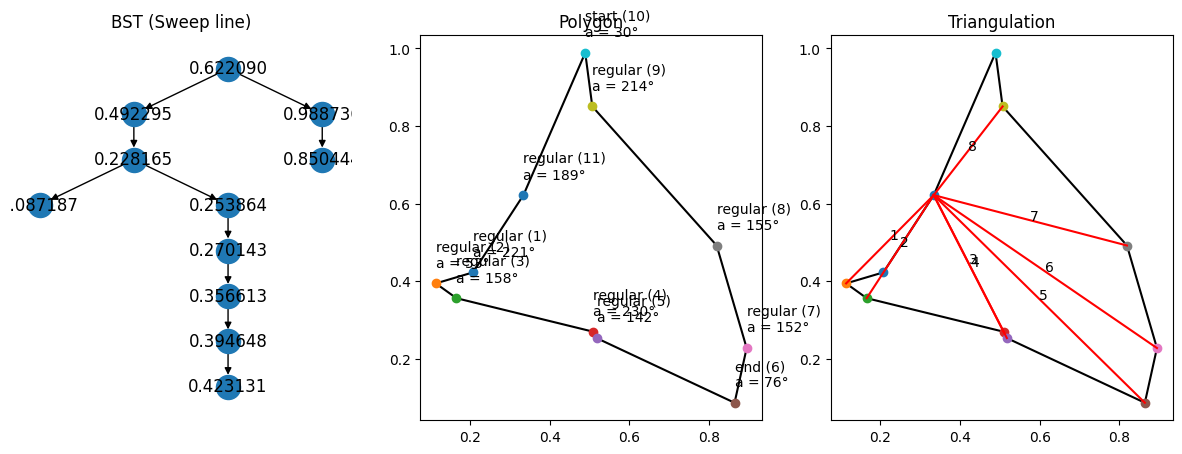

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate random points
vs = generate_clockwise_polygon(11)
vs_segments = [[vs[i],vs[i+1]] for i in range(len(vs)-1)]+[[vs[-1],vs[0]]]

# Create a BST (Sweep line)
root = Node(vs[0][1])
for i in range(1, len(vs)):
    root.insert(vs[i][1])

# Create a tree plot
def create_tree(root, G, parent=None):
    if root is not None:
        if parent is not None:
            G.add_edge(parent, f"{root.val:.6f}")
        create_tree(root.left, G, f"{root.val:.6f}")
        create_tree(root.right, G, f"{root.val:.6f}")

G = nx.DiGraph()
# Plots
fig, ax = plt.subplots(1,3,figsize=(15,5))
create_tree(root, G)
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
# Tree plot
nx.draw(G, pos, with_labels=True, arrows=True, ax=ax[0])
ax[0].set_title("BST (Sweep line)")
# Polygon plot
for i in vs_segments:
    ax[1].plot([i[0][0],i[1][0]],[i[0][1],i[1][1]],'k')
    ax[2].plot([i[0][0],i[1][0]],[i[0][1],i[1][1]],'k')

c=1
for i in range(len(vs)-1,-1,-1):
    ax[1].plot(vs[i][0],vs[i][1],'o')
    ax[2].plot(vs[i][0],vs[i][1],'o')
    t,a = type(vs[i-1],vs[i],vs[(i+1)%len(vs)])
    ax[1].text(vs[i][0],vs[i][1],f"{t} ({c})\na = {a:.0f}°\n")
    # arc = Arc((vs[i][0],vs[i][1]),0.1,0.1, theta1=0, theta2=a, color='r')
    # plt.gca().add_patch(arc)
    c+=1
ax[1].set_title("Polygon")
# Triangulation plot
triangles = triangulation_y_monotone(vs.copy(), [])[::-1][1:]
for t in triangles:
    ax[2].plot([t[0][0],t[1][0]],[t[0][1],t[1][1]],'r')
    ax[2].text((t[0][0]+t[1][0])/2,(t[0][1]+t[1][1])/2,f"{triangles.index(t)+1}")
ax[2].set_title("Triangulation")
# Show
plt.show()


In [ ]:
# !sudo apt-get install graphviz graphviz-dev
# %pip install pygraphviz